Getting dataset

In [1]:
# Importing the neccessary libraries
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


import gdown

# Downloading the Kaggle Dataset.
file_ids = ["1m99RBSAG4zIPOJ2nfRupHj-jZDteTr6G", "1p-bKN89n-r-HnDGRmVF2tDpvHA5DUv0w", "1XDBeNesyWO9YKVxh5fGtzQM4V-YXL_ZJ","1hakH4A1exZu58b8AEakkJFNktCGjMoAH","1Tf03LIjkD3GsLHO_meTUocIhdZ-uZHbM","1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA","1YZymTI35b22W8Z_X371xAIYUWz7SztLW"]  # Add all file IDs here
destinations=["assessments.csv","courses.csv","studentAssessment.csv","studentInfo.csv","studentRegistration.csv","studentVle.csv","vle.csv"]
for i, file_id in enumerate(file_ids, 0):
    destination = f"file_{i}.csv"
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, destinations[i], quiet=False)
    print(f"Downloaded: {destinations[i]}")

Downloading...
From: https://drive.google.com/uc?id=1m99RBSAG4zIPOJ2nfRupHj-jZDteTr6G
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\assessments.csv
100%|██████████| 8.20k/8.20k [00:00<?, ?B/s]


Downloaded: assessments.csv


Downloading...
From: https://drive.google.com/uc?id=1p-bKN89n-r-HnDGRmVF2tDpvHA5DUv0w
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\courses.csv
100%|██████████| 526/526 [00:00<?, ?B/s] 


Downloaded: courses.csv


Downloading...
From: https://drive.google.com/uc?id=1XDBeNesyWO9YKVxh5fGtzQM4V-YXL_ZJ
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\studentAssessment.csv
100%|██████████| 5.69M/5.69M [00:01<00:00, 5.43MB/s]


Downloaded: studentAssessment.csv


Downloading...
From: https://drive.google.com/uc?id=1hakH4A1exZu58b8AEakkJFNktCGjMoAH
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\studentInfo.csv
100%|██████████| 3.46M/3.46M [00:00<00:00, 6.31MB/s]


Downloaded: studentInfo.csv


Downloading...
From: https://drive.google.com/uc?id=1Tf03LIjkD3GsLHO_meTUocIhdZ-uZHbM
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\studentRegistration.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 5.33MB/s]


Downloaded: studentRegistration.csv


Downloading...
From (original): https://drive.google.com/uc?id=1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA
From (redirected): https://drive.google.com/uc?id=1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA&confirm=t&uuid=65906c47-bcb1-4281-968b-c11022e56b41
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\studentVle.csv
100%|██████████| 454M/454M [02:10<00:00, 3.48MB/s] 


Downloaded: studentVle.csv


Downloading...
From: https://drive.google.com/uc?id=1YZymTI35b22W8Z_X371xAIYUWz7SztLW
To: c:\Users\chipp\Documents\School\Y3T2\Student-Grade-Predictor\2)ML_Algo\vle.csv
100%|██████████| 260k/260k [00:00<00:00, 4.85MB/s]

Downloaded: vle.csv


Initialising df

In [2]:
import pandas as pd

# 1. Load your CSV files into DataFrames
df_assessments = pd.read_csv("assessments.csv")
df_courses = pd.read_csv("courses.csv")
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")
df_studentRegistration = pd.read_csv("studentRegistration.csv")
df_studentVle = pd.read_csv("studentVle.csv")
df_vle = pd.read_csv("vle.csv")

# Count how many unique assessments exist for each module + presentation
df_course_assess_count = (
    df_assessments
    .groupby(["code_module", "code_presentation"])["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "total_assessments"})
)

# Count how many assessments each student attempted
df_attempted_count = (
    df_studentAssessment
    .groupby("id_student")["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "num_assessments_attempted"})
)

# Compute average score for each student
df_avg_score = (
    df_studentAssessment
    .groupby("id_student")["score"]
    .mean()  # or .sum() if you prefer total score
    .reset_index()
    .rename(columns={"score": "score"})
)

df_vle_clicks = (
    df_studentVle
    .groupby("id_student")["sum_click"]
    .sum()
    .reset_index()
    .rename(columns={"sum_click": "total_vle_clicks"})
)


# 3.1 Merge total_assessments (on code_module + code_presentation)
df_merged = pd.merge(
    df_studentInfo,
    df_course_assess_count,
    on=["code_module", "code_presentation"],
    how="left"
)

# 3.2 Merge attempted_assessments & average_score (on id_student)
df_merged = pd.merge(
    df_merged,
    df_attempted_count,
    on="id_student",
    how="left"
)

df_merged = pd.merge(
    df_merged,
    df_avg_score,
    on="id_student",
    how="left"
)

# 3.3 Merge total_vle_clicks (on id_student)
df_merged = pd.merge(
    df_merged,
    df_vle_clicks,
    on="id_student",
    how="left"
)

# Replace NaN with 0 if needed
df_merged["num_assessments_attempted"] = df_merged["num_assessments_attempted"].fillna(0)
df_merged["total_assessments"] = df_merged["total_assessments"].fillna(0)
df_merged["score"] = df_merged["score"].fillna(0)  # if missing, assume 0 or handle differently
df_merged["total_vle_clicks"] = df_merged["total_vle_clicks"].fillna(0)

# Compute ratio safely
def completion_ratio(row):
    if row["total_assessments"] == 0:
        return 0
    return row["num_assessments_attempted"] / row["total_assessments"]

df_merged["assessment_completion_ratio"] = df_merged.apply(completion_ratio, axis=1)

# Filter out withdrawn
df_merged = df_merged[
    (df_merged["final_result"] != "Withdrawn") & 
    (df_merged["code_module"] == "FFF")
].copy()

# Create binary target
df_merged["target"] = df_merged["final_result"].apply(
    lambda x: 1 if x in ["Pass", "Distinction"] else 0
)


# Rename columns for clarity
df_merged.rename(
    columns={
        "highest_education": "HLE",
        "age_band": "Age group",
        "studied_credits": "Credit Distribution",
        "gender": "Gender",
        "region": "Region"
    },
    inplace=True
)

# Reorder columns into a final DataFrame
df_final = df_merged[
    [
        "id_student", 
        "score",
        "Gender",
        "Region",
        "HLE",
        "Age group",
        "Credit Distribution",
        "assessment_completion_ratio",
        "total_vle_clicks",
        "target"
    ]
].copy()

# Check final data
print(df_final.head(10))
print("Number of rows in df_final:", len(df_final))


       id_student      score Gender                Region  \
22297       33915  91.500000      F     South East Region   
22298       35544  87.583333      M                 Wales   
22299       35860  83.000000      M     South West Region   
22302       37298  84.181818      M               Ireland   
22303       42668  78.666667      M         London Region   
22305       43273  76.000000      M  East Midlands Region   
22306       43430  86.583333      M     South West Region   
22308       50263  76.642857      M  West Midlands Region   
22309       53197   0.000000      F  North Western Region   
22311       55450  74.250000      M     South East Region   

                         HLE Age group  Credit Distribution  \
22297  A Level or Equivalent      0-35                   60   
22298  A Level or Equivalent     35-55                   60   
22299  A Level or Equivalent      0-35                   60   
22302       HE Qualification      0-35                  120   
22303     Low

ML Algos:

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Assume df_final contains only data from module FFF and includes the following columns:
# "score", "Gender", "Region", "HLE", "Age group", "Credit Distribution",
# "assessment_completion_ratio", "total_vle_clicks", and "target" (binary: Pass/Distinction=1, Fail=0)

# Define the list of features
features = [
    'score', 'Gender', 'Region', 'HLE', 'Age group', 
    'Credit Distribution', 'assessment_completion_ratio', 'total_vle_clicks'
]

# Separate features and target
X = df_final[features]
y = df_final['target']

# One-hot encode categorical variables to convert them into numeric features.
# Adjust drop_first if you want to avoid dummy variable trap.
X_encoded = pd.get_dummies(X, columns=['Gender', 'Region', 'HLE', 'Age group'], drop_first=True)

# Split the data into training and test sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 1. Decision Tree Classifier
# -------------------------------
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
balanced_accuracy_dt = balanced_accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Balanced Accuracy:", balanced_accuracy_dt)
print("Decision Tree F1 Score:", f1_dt)
print("Decision Tree Confusion Matrix:\n", cm_dt)

# -------------------------------
# 2. Random Forest Classifier (Bagging)
# -------------------------------
clf_rf = RandomForestClassifier(
    n_estimators=100, max_depth=3, random_state=42,
    bootstrap=True, oob_score=True
)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
oob_score_rf = clf_rf.oob_score_

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Balanced Accuracy:", balanced_accuracy_rf)
print("Random Forest F1 Score:", f1_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
print("Random Forest OOB Score:", oob_score_rf)

# -------------------------------
# 3. AdaBoost Classifier (Boosting)
# -------------------------------
# Here we use a Decision Tree with max_depth=1 as the base estimator.
clf_ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100, random_state=42
)
clf_ab.fit(X_train, y_train)
y_pred_ab = clf_ab.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
balanced_accuracy_ab = balanced_accuracy_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)
cm_ab = confusion_matrix(y_test, y_pred_ab)

print("\nAdaBoost Accuracy:", accuracy_ab)
print("AdaBoost Balanced Accuracy:", balanced_accuracy_ab)
print("AdaBoost F1 Score:", f1_ab)
print("AdaBoost Confusion Matrix:\n", cm_ab)


Decision Tree Accuracy: 0.9164179104477612
Decision Tree Balanced Accuracy: 0.8809384735202492
Decision Tree F1 Score: 0.9409905163329821
Decision Tree Confusion Matrix:
 [[335  93]
 [ 19 893]]

Random Forest Accuracy: 0.9097014925373135
Random Forest Balanced Accuracy: 0.8611247745532055
Random Forest F1 Score: 0.9375322663913268
Random Forest Confusion Matrix:
 [[311 117]
 [  4 908]]
Random Forest OOB Score: 0.9136601144563324

AdaBoost Accuracy: 0.9171641791044776
AdaBoost Balanced Accuracy: 0.8870665272995573
AdaBoost F1 Score: 0.9409888357256778
AdaBoost Confusion Matrix:
 [[344  84]
 [ 27 885]]


Testing of model trained on FFF on BBB

<>:184: SyntaxWarning: invalid escape sequence '\O'
<>:188: SyntaxWarning: invalid escape sequence '\O'
<>:184: SyntaxWarning: invalid escape sequence '\O'
<>:188: SyntaxWarning: invalid escape sequence '\O'
C:\Users\admin\AppData\Local\Temp\ipykernel_34560\2662305034.py:184: SyntaxWarning: invalid escape sequence '\O'
  print("\Other Modules - Random Forest Confusion Matrix:")
C:\Users\admin\AppData\Local\Temp\ipykernel_34560\2662305034.py:188: SyntaxWarning: invalid escape sequence '\O'
  print("\Other Modules - AdaBoost Confusion Matrix:")


Module BBB data shape: (17078, 9)
    score Gender                Region                          HLE Age group  \
0    82.0      M   East Anglian Region             HE Qualification      55<=   
1    66.4      F              Scotland             HE Qualification     35-55   
3    76.0      F     South East Region        A Level or Equivalent     35-55   
4    54.4      F  West Midlands Region           Lower Than A Level      0-35   
5    68.0      M                 Wales        A Level or Equivalent     35-55   
6    68.0      M              Scotland             HE Qualification      0-35   
7    72.4      F  North Western Region        A Level or Equivalent      0-35   
8    71.4      F   East Anglian Region        A Level or Equivalent      0-35   
9    78.0      M          North Region  Post Graduate Qualification      55<=   
10   74.0      M          South Region           Lower Than A Level     35-55   

    Credit Distribution  assessment_completion_ratio  total_vle_clicks  ta

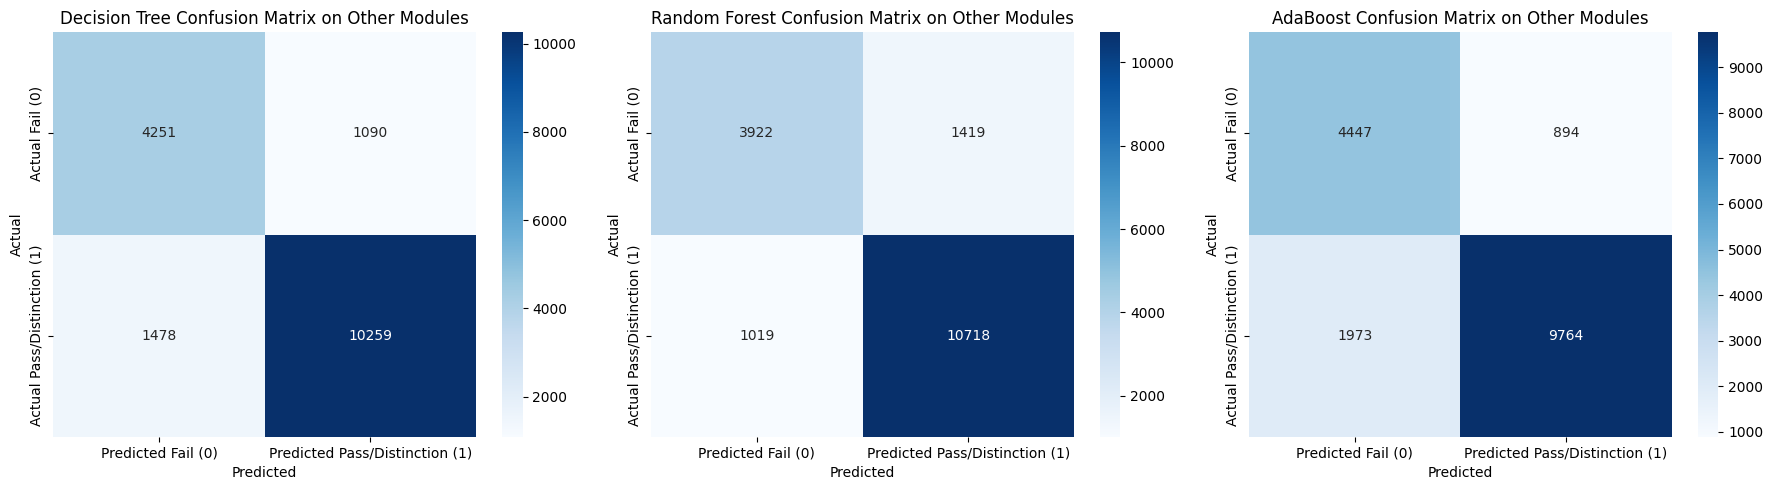

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# ----------------------------
# 1. Recreate the Full Merged DataFrame (df_merged_all)
# ----------------------------

# Load CSV files
df_assessments = pd.read_csv("assessments.csv")
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")
df_studentVle = pd.read_csv("studentVle.csv")

# 1.1 Compute total number of assessments per module & presentation
df_course_assess_count = (
    df_assessments
    .groupby(["code_module", "code_presentation"])["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "total_assessments"})
)

# 1.2 Compute number of assessments attempted per student
df_attempted_count = (
    df_studentAssessment
    .groupby("id_student")["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "num_assessments_attempted"})
)

# 1.3 Compute average score per student (or total score as desired)
df_avg_score = (
    df_studentAssessment
    .groupby("id_student")["score"]
    .mean()
    .reset_index()
    .rename(columns={"score": "score"})
)

# 1.4 Compute total VLE clicks per student
df_vle_clicks = (
    df_studentVle
    .groupby("id_student")["sum_click"]
    .sum()
    .reset_index()
    .rename(columns={"sum_click": "total_vle_clicks"})
)

# 1.5 Merge these summaries into df_studentInfo to create df_merged_all.
# Start with df_studentInfo (which contains one row per student)
df_merged_all = pd.merge(
    df_studentInfo, df_course_assess_count,
    on=["code_module", "code_presentation"],
    how="left"
)
df_merged_all = pd.merge(
    df_merged_all, df_attempted_count,
    on="id_student", how="left"
)
df_merged_all = pd.merge(
    df_merged_all, df_avg_score,
    on="id_student", how="left"
)
df_merged_all = pd.merge(
    df_merged_all, df_vle_clicks,
    on="id_student", how="left"
)

# Fill missing values (if a student has no assessments or VLE clicks)
df_merged_all["num_assessments_attempted"] = df_merged_all["num_assessments_attempted"].fillna(0)
df_merged_all["total_assessments"] = df_merged_all["total_assessments"].fillna(0)
df_merged_all["score"] = df_merged_all["score"].fillna(0)
df_merged_all["total_vle_clicks"] = df_merged_all["total_vle_clicks"].fillna(0)

# 1.6 Create the engineered feature: assessment_completion_ratio
def compute_completion_ratio(row):
    if row["total_assessments"] == 0:
        return 0
    return row["num_assessments_attempted"] / row["total_assessments"]

df_merged_all["assessment_completion_ratio"] = df_merged_all.apply(compute_completion_ratio, axis=1)

# ----------------------------
# 2. Create a New DataFrame for Module BBB (df_merged_BBB) and Final Feature Set (df_final_BBB)
# ----------------------------

# Filter for module 'BBB' from the full merged DataFrame
df_merged_Others = df_merged_all[df_merged_all["code_module"] != "FFF"].copy()

# Remove withdrawn students and create the binary target:
# (Pass/Distinction = 1, Fail = 0)
df_merged_Others = df_merged_Others[df_merged_Others["final_result"] != "Withdrawn"].copy()
df_merged_Others["target"] = df_merged_Others["final_result"].apply(
    lambda x: 1 if x in ["Pass", "Distinction"] else 0
)

# Rename columns for consistency
df_merged_Others.rename(
    columns={
        "highest_education": "HLE",
        "age_band": "Age group",
        "studied_credits": "Credit Distribution",
        "gender": "Gender",
        "region": "Region"
    },
    inplace=True
)

# Select the final columns for df_final_BBB
df_final_Others = df_merged_Others[
    [
        "score",
        "Gender",
        "Region",
        "HLE",
        "Age group",
        "Credit Distribution",
        "assessment_completion_ratio",
        "total_vle_clicks",
        "target"
    ]
].copy()

print("Module BBB data shape:", df_final_Others.shape)
print(df_final_Others.head(10))

# ----------------------------
# 3. Prepare Features for Prediction on Module BBB
# ----------------------------

features = [
    'score', 
    'Gender', 
    'Region', 
    'HLE', 
    'Age group', 
    'Credit Distribution', 
    'assessment_completion_ratio', 
    'total_vle_clicks'
]
X_new = df_final_Others[features]
y_new = df_final_Others['target']

# One-hot encode categorical variables for X_new.
# (This should be done using the same approach as for your module FFF training data.)
X_new_encoded = pd.get_dummies(X_new, columns=['Gender', 'Region', 'HLE', 'Age group'], drop_first=True)

# IMPORTANT: Ensure that X_new_encoded has the same columns as the training data.
# Here we use the columns from X_train (which was created from module FFF) as reference.
# If you don't have X_train saved, you should re-run the train split from module FFF.
X_new_encoded = X_new_encoded.reindex(columns=X_train.columns, fill_value=0)

# ----------------------------
# 4. Use Pre-Trained Models on Module BBB Data
# ----------------------------

# Assuming that clf_dt, clf_rf, and clf_ab were pre-trained on module FFF data,
# we now use them to predict on the new module BBB data.

y_pred_dt_new = clf_dt.predict(X_new_encoded)
y_pred_rf_new = clf_rf.predict(X_new_encoded)
y_pred_ab_new = clf_ab.predict(X_new_encoded)

# Compute confusion matrices and accuracies for each model
cm_dt_new = confusion_matrix(y_new, y_pred_dt_new)
cm_rf_new = confusion_matrix(y_new, y_pred_rf_new)
cm_ab_new = confusion_matrix(y_new, y_pred_ab_new)

accuracy_dt_new = accuracy_score(y_new, y_pred_dt_new)
accuracy_rf_new = accuracy_score(y_new, y_pred_rf_new)
accuracy_ab_new = accuracy_score(y_new, y_pred_ab_new)

print("Other Modules - Decision Tree Confusion Matrix:")
print(cm_dt_new)
print("Decision Tree Accuracy:", accuracy_dt_new)

print("\Other Modules - Random Forest Confusion Matrix:")
print(cm_rf_new)
print("Random Forest Accuracy:", accuracy_rf_new)

print("\Other Modules - AdaBoost Confusion Matrix:")
print(cm_ab_new)
print("AdaBoost Accuracy:", accuracy_ab_new)

# ----------------------------
# 5. Plot Confusion Matrices Side-by-Side for Module BBB Predictions
# ----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost']
cms_new = [cm_dt_new, cm_rf_new, cm_ab_new]

for ax, model, cm in zip(axes, model_names, cms_new):
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues', ax=ax,
        xticklabels=["Predicted Fail (0)", "Predicted Pass/Distinction (1)"],
        yticklabels=["Actual Fail (0)", "Actual Pass/Distinction (1)"]
    )
    ax.set_title(f"{model} Confusion Matrix on Other Modules")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    
plt.tight_layout()
plt.show()


Hyperparams tuning

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Decision Tree CV Accuracy: 0.9209246218581107
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Random Forest Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Accuracy: 0.9248878698120239
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best AdaBoost Params: {'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 0.1, 'n_estimators': 50}
Best AdaBoost CV Accuracy: 0.9258210867312385

=== FFF Test Set Evaluation ===
Decision Tree Confusion Matrix:
 [[271  71]
 [ 24 706]]
Decision Tree Accuracy: 0.9113805970149254
Decision Tree F1 Score: 0.9369608493696084

Random Forest Confusion Matrix:
 [[269  73]
 [ 21 709]]
Random Forest Accuracy: 0.9123

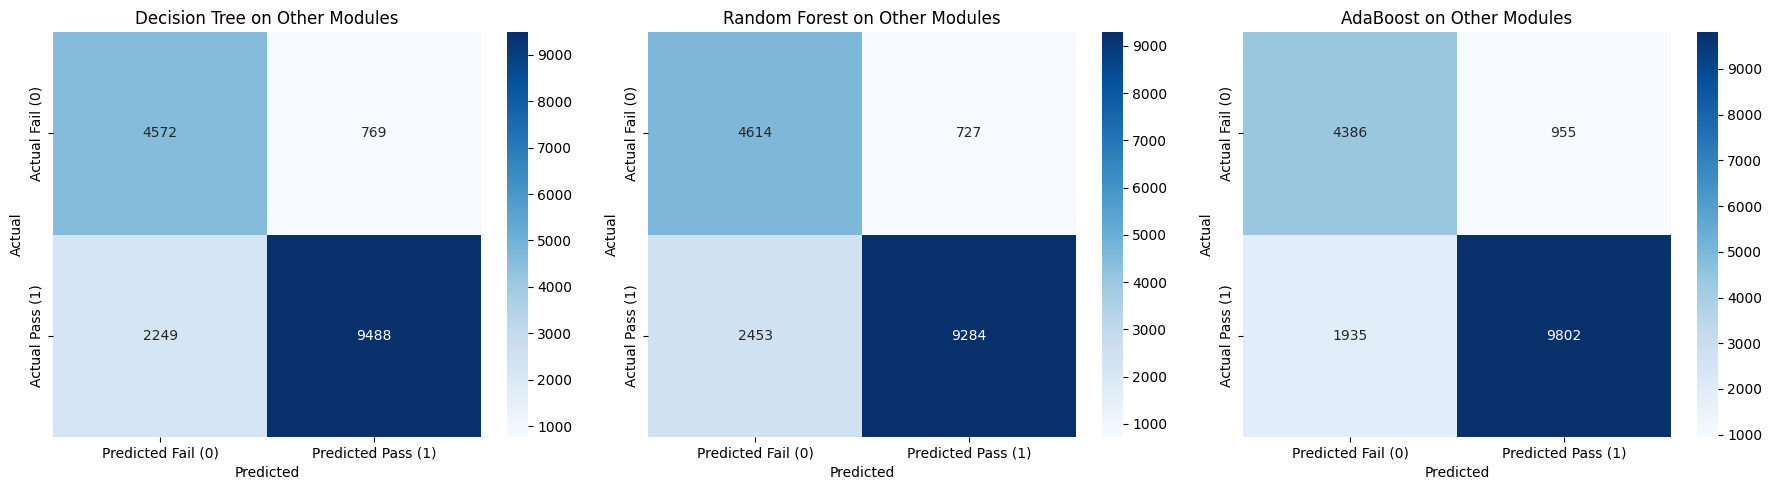

C:\Users\admin\AppData\Local\Temp\ipykernel_34560\534722626.py:381: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_list, y=acc_list, palette='Blues_d')


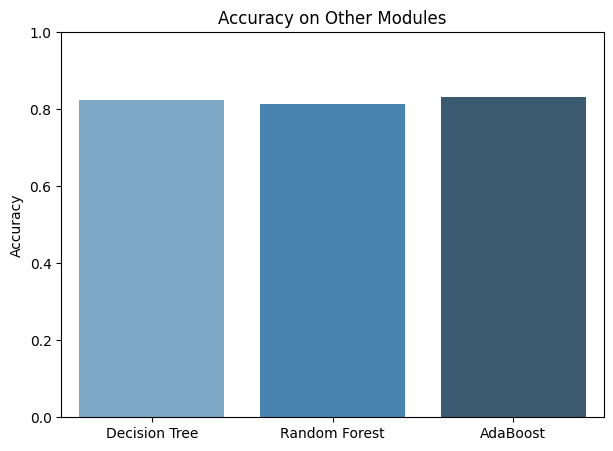

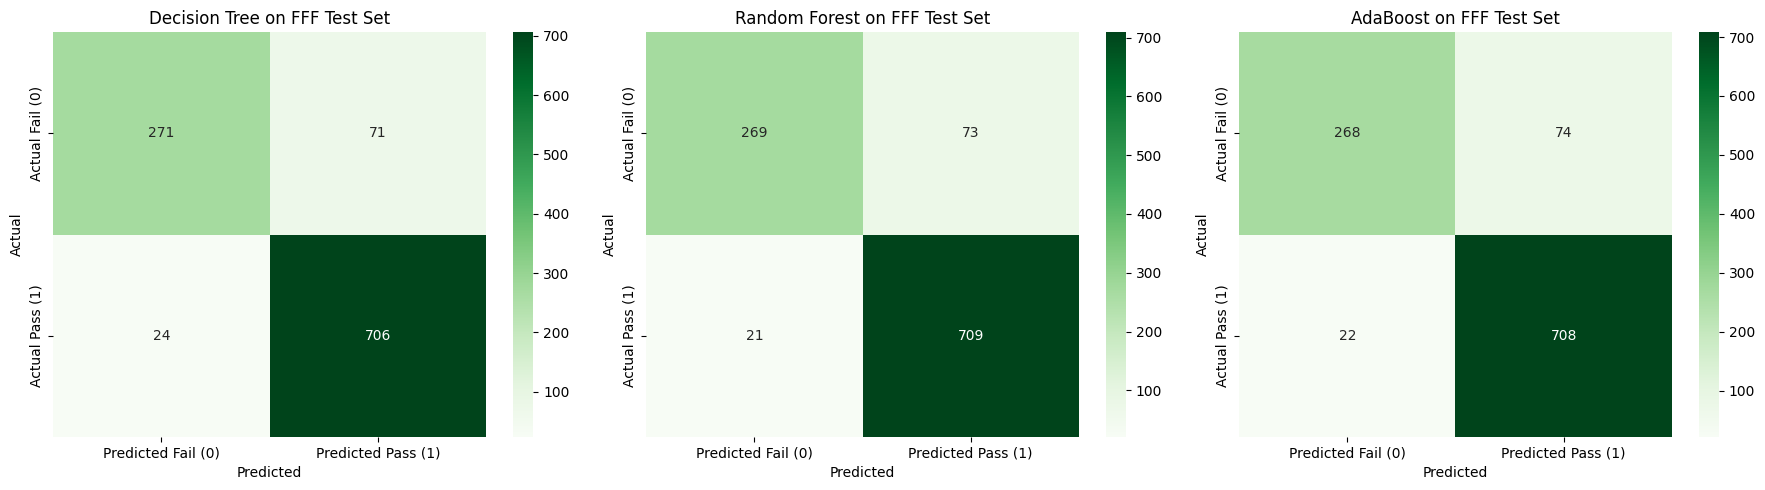


=== Accuracy and F1 Score Summary ===
FFF Test Set -> Decision Tree: Accuracy=0.9114, F1=0.9370
FFF Test Set -> Random Forest: Accuracy=0.9123, F1=0.9378
FFF Test Set -> AdaBoost: Accuracy=0.9104, F1=0.9365
Others Data  -> Decision Tree: Accuracy=0.8233, F1=0.8628
Others Data  -> Random Forest: Accuracy=0.8138, F1=0.8538
Others Data  -> AdaBoost: Accuracy=0.8308, F1=0.8715


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

# ----------------------------
# 1. Load and Merge the Data
# ----------------------------

# Load CSV files
df_assessments = pd.read_csv("assessments.csv")
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")
df_studentVle = pd.read_csv("studentVle.csv")

# 1.1 Compute total number of assessments per module & presentation
df_course_assess_count = (
    df_assessments
    .groupby(["code_module", "code_presentation"])["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "total_assessments"})
)

# 1.2 Compute number of assessments attempted per student
df_attempted_count = (
    df_studentAssessment
    .groupby("id_student")["id_assessment"]
    .count()
    .reset_index()
    .rename(columns={"id_assessment": "num_assessments_attempted"})
)

# 1.3 Compute average score per student
df_avg_score = (
    df_studentAssessment
    .groupby("id_student")["score"]
    .mean()
    .reset_index()
    .rename(columns={"score": "score"})
)

# 1.4 Compute total VLE clicks per student
df_vle_clicks = (
    df_studentVle
    .groupby("id_student")["sum_click"]
    .sum()
    .reset_index()
    .rename(columns={"sum_click": "total_vle_clicks"})
)

# 1.5 Merge these summaries into df_studentInfo to create df_merged_all
df_merged_all = pd.merge(
    df_studentInfo, df_course_assess_count,
    on=["code_module", "code_presentation"],
    how="left"
)
df_merged_all = pd.merge(
    df_merged_all, df_attempted_count,
    on="id_student", how="left"
)
df_merged_all = pd.merge(
    df_merged_all, df_avg_score,
    on="id_student", how="left"
)
df_merged_all = pd.merge(
    df_merged_all, df_vle_clicks,
    on="id_student", how="left"
)

# Fill missing values
df_merged_all["num_assessments_attempted"] = df_merged_all["num_assessments_attempted"].fillna(0)
df_merged_all["total_assessments"] = df_merged_all["total_assessments"].fillna(0)
df_merged_all["score"] = df_merged_all["score"].fillna(0)
df_merged_all["total_vle_clicks"] = df_merged_all["total_vle_clicks"].fillna(0)

# 1.6 Create an engineered feature: assessment_completion_ratio
def compute_completion_ratio(row):
    if row["total_assessments"] == 0:
        return 0
    return row["num_assessments_attempted"] / row["total_assessments"]

df_merged_all["assessment_completion_ratio"] = df_merged_all.apply(compute_completion_ratio, axis=1)

# ----------------------------
# 2. Split Data into Module FFF (Training) vs. Others (Testing)
# ----------------------------

# A) Create DataFrame for Module FFF
df_merged_FFF = df_merged_all[df_merged_all["code_module"] == "FFF"].copy()

# Remove withdrawn students, create binary target (Pass/Distinction=1, Fail=0)
df_merged_FFF = df_merged_FFF[df_merged_FFF["final_result"] != "Withdrawn"].copy()
df_merged_FFF["target"] = df_merged_FFF["final_result"].apply(
    lambda x: 1 if x in ["Pass", "Distinction"] else 0
)

# Rename columns for consistency
df_merged_FFF.rename(
    columns={
        "highest_education": "HLE",
        "age_band": "Age group",
        "studied_credits": "Credit Distribution",
        "gender": "Gender",
        "region": "Region"
    },
    inplace=True
)

# Select final features + target for FFF
df_final_FFF = df_merged_FFF[
    [
        "score",
        "Gender",
        "Region",
        "HLE",
        "Age group",
        "Credit Distribution",
        "assessment_completion_ratio",
        "total_vle_clicks",
        "target"
    ]
].copy()

# B) Create DataFrame for Other Modules
df_merged_Others = df_merged_all[df_merged_all["code_module"] != "FFF"].copy()

# Remove withdrawn students, create binary target
df_merged_Others = df_merged_Others[df_merged_Others["final_result"] != "Withdrawn"].copy()
df_merged_Others["target"] = df_merged_Others["final_result"].apply(
    lambda x: 1 if x in ["Pass", "Distinction"] else 0
)

# Rename columns for consistency
df_merged_Others.rename(
    columns={
        "highest_education": "HLE",
        "age_band": "Age group",
        "studied_credits": "Credit Distribution",
        "gender": "Gender",
        "region": "Region"
    },
    inplace=True
)

# Select final features + target for Other Modules
df_final_Others = df_merged_Others[
    [
        "score",
        "Gender",
        "Region",
        "HLE",
        "Age group",
        "Credit Distribution",
        "assessment_completion_ratio",
        "total_vle_clicks",
        "target"
    ]
].copy()

# ----------------------------
# 3. Prepare FFF Data (Train/Test Split) and One-Hot Encoding
# ----------------------------

features = [
    "score",
    "Gender",
    "Region",
    "HLE",
    "Age group",
    "Credit Distribution",
    "assessment_completion_ratio",
    "total_vle_clicks"
]

X_FFF = df_final_FFF[features]
y_FFF = df_final_FFF["target"]

# One-hot encode categorical variables
X_FFF_encoded = pd.get_dummies(
    X_FFF, 
    columns=["Gender", "Region", "HLE", "Age group"], 
    drop_first=True
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_FFF_encoded, 
    y_FFF, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_FFF
)

# ----------------------------
# 4. Hyperparameter Tuning with GridSearchCV
# ----------------------------

# 4.1 Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Params:", grid_search_dt.best_params_)
print("Best Decision Tree CV Accuracy:", grid_search_dt.best_score_)

# 4.2 Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Params:", grid_search_rf.best_params_)
print("Best Random Forest CV Accuracy:", grid_search_rf.best_score_)

# 4.3 AdaBoost
# If you want to tune the base estimator, you can do so via 'estimator__' parameters.
base_est = DecisionTreeClassifier(random_state=42)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 5],
    'estimator__min_samples_split': [2, 5]
}
ada = AdaBoostClassifier(estimator=base_est, random_state=42)
grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search_ada.fit(X_train, y_train)
best_ada = grid_search_ada.best_estimator_
print("Best AdaBoost Params:", grid_search_ada.best_params_)
print("Best AdaBoost CV Accuracy:", grid_search_ada.best_score_)

# ----------------------------
# 5. Evaluate on FFF Test Set
# ----------------------------

y_pred_dt_test = best_dt.predict(X_test)
y_pred_rf_test = best_rf.predict(X_test)
y_pred_ada_test = best_ada.predict(X_test)

cm_dt_test = confusion_matrix(y_test, y_pred_dt_test)
cm_rf_test = confusion_matrix(y_test, y_pred_rf_test)
cm_ada_test = confusion_matrix(y_test, y_pred_ada_test)

acc_dt_test = accuracy_score(y_test, y_pred_dt_test)
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)
acc_ada_test = accuracy_score(y_test, y_pred_ada_test)

f1_dt_test = f1_score(y_test, y_pred_dt_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
f1_ada_test = f1_score(y_test, y_pred_ada_test)

print("\n=== FFF Test Set Evaluation ===")
print("Decision Tree Confusion Matrix:\n", cm_dt_test)
print("Decision Tree Accuracy:", acc_dt_test)
print("Decision Tree F1 Score:", f1_dt_test)

print("\nRandom Forest Confusion Matrix:\n", cm_rf_test)
print("Random Forest Accuracy:", acc_rf_test)
print("Random Forest F1 Score:", f1_rf_test)

print("\nAdaBoost Confusion Matrix:\n", cm_ada_test)
print("AdaBoost Accuracy:", acc_ada_test)
print("AdaBoost F1 Score:", f1_ada_test)

# ----------------------------
# 6. Evaluate on Other Modules
# ----------------------------
# Prepare the "Others" data with the same feature encoding used for FFF
X_Others = df_final_Others[features]
y_Others = df_final_Others["target"]

# One-hot encode (reindex to match training columns)
X_Others_encoded = pd.get_dummies(
    X_Others, 
    columns=["Gender", "Region", "HLE", "Age group"], 
    drop_first=True
)
# Ensure same columns as X_FFF_encoded
X_Others_encoded = X_Others_encoded.reindex(columns=X_FFF_encoded.columns, fill_value=0)

# Predict with the best models
y_pred_dt_others = best_dt.predict(X_Others_encoded)
y_pred_rf_others = best_rf.predict(X_Others_encoded)
y_pred_ada_others = best_ada.predict(X_Others_encoded)

cm_dt_others = confusion_matrix(y_Others, y_pred_dt_others)
cm_rf_others = confusion_matrix(y_Others, y_pred_rf_others)
cm_ada_others = confusion_matrix(y_Others, y_pred_ada_others)

acc_dt_others = accuracy_score(y_Others, y_pred_dt_others)
acc_rf_others = accuracy_score(y_Others, y_pred_rf_others)
acc_ada_others = accuracy_score(y_Others, y_pred_ada_others)

f1_dt_others = f1_score(y_Others, y_pred_dt_others)
f1_rf_others = f1_score(y_Others, y_pred_rf_others)
f1_ada_others = f1_score(y_Others, y_pred_ada_others)

print("\n=== Other Modules Evaluation ===")
print("Other Modules - Decision Tree Confusion Matrix:")
print(cm_dt_others)
print("Decision Tree Accuracy:", acc_dt_others)
print("Decision Tree F1 Score:", f1_dt_others)

print("\nOther Modules - Random Forest Confusion Matrix:")
print(cm_rf_others)
print("Random Forest Accuracy:", acc_rf_others)
print("Random Forest F1 Score:", f1_rf_others)

print("\nOther Modules - AdaBoost Confusion Matrix:")
print(cm_ada_others)
print("AdaBoost Accuracy:", acc_ada_others)
print("AdaBoost F1 Score:", f1_ada_others)

# ----------------------------
# 7. Visualization
# ----------------------------

# A) Confusion Matrices on Other Modules (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost']
cms_others = [cm_dt_others, cm_rf_others, cm_ada_others]

for ax, model, cm in zip(axes, model_names, cms_others):
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues', ax=ax,
        xticklabels=["Predicted Fail (0)", "Predicted Pass (1)"],
        yticklabels=["Actual Fail (0)", "Actual Pass (1)"]
    )
    ax.set_title(f"{model} on Other Modules")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# B) Bar chart of accuracies on Other Modules
model_list = ['Decision Tree', 'Random Forest', 'AdaBoost']
acc_list = [acc_dt_others, acc_rf_others, acc_ada_others]

plt.figure(figsize=(7,5))
sns.barplot(x=model_list, y=acc_list, palette='Blues_d')
plt.ylim([0,1])
plt.title("Accuracy on Other Modules")
plt.ylabel("Accuracy")
plt.show()

# (Optional) Confusion Matrices on FFF Test Set (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cms_fff = [cm_dt_test, cm_rf_test, cm_ada_test]
for ax, model, cm in zip(axes, model_names, cms_fff):
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Greens', ax=ax,
        xticklabels=["Predicted Fail (0)", "Predicted Pass (1)"],
        yticklabels=["Actual Fail (0)", "Actual Pass (1)"]
    )
    ax.set_title(f"{model} on FFF Test Set")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# C) Print summary
print("\n=== Accuracy and F1 Score Summary ===")
print(f"FFF Test Set -> Decision Tree: Accuracy={acc_dt_test:.4f}, F1={f1_dt_test:.4f}")
print(f"FFF Test Set -> Random Forest: Accuracy={acc_rf_test:.4f}, F1={f1_rf_test:.4f}")
print(f"FFF Test Set -> AdaBoost: Accuracy={acc_ada_test:.4f}, F1={f1_ada_test:.4f}")
print(f"Others Data  -> Decision Tree: Accuracy={acc_dt_others:.4f}, F1={f1_dt_others:.4f}")
print(f"Others Data  -> Random Forest: Accuracy={acc_rf_others:.4f}, F1={f1_rf_others:.4f}")
print(f"Others Data  -> AdaBoost: Accuracy={acc_ada_others:.4f}, F1={f1_ada_others:.4f}")
